In [28]:
#we will also learn early stopping and dropout layers
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df=pd.read_csv('TensorFlow_FILES/DATA/cancer_classification.csv')

In [30]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

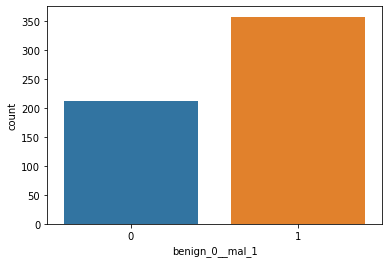

In [32]:
sns.countplot(x=df['benign_0__mal_1'])

<AxesSubplot:>

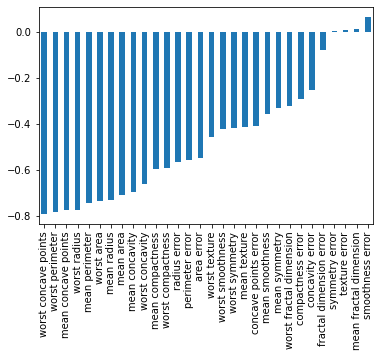

In [33]:
#values are highly correlated so we should get good results
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

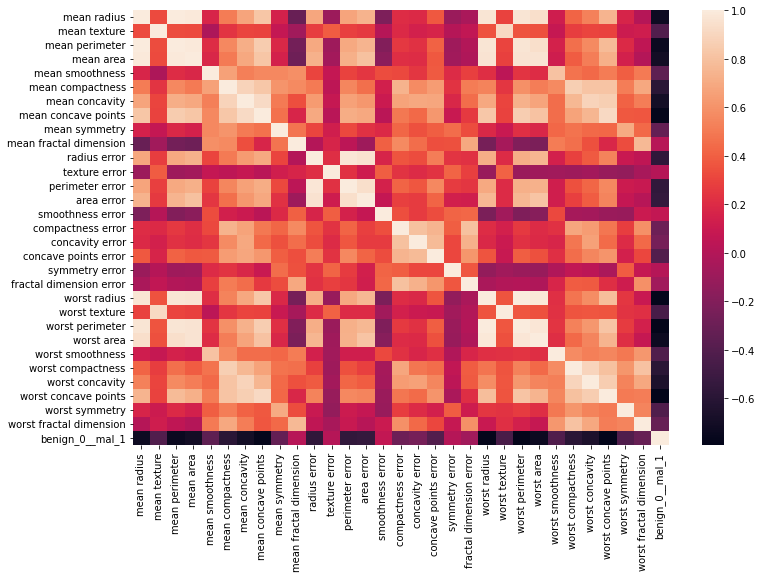

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [35]:
x=df.drop('benign_0__mal_1',axis=1).values

In [36]:
y=df['benign_0__mal_1'].values

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=101)

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler=MinMaxScaler()

In [41]:
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [42]:
from tensorflow.keras.models import Sequential

In [43]:
from tensorflow.keras.layers import Dense,Dropout

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
from tensorflow.keras.layers import Dropout

In [46]:
#one other thing we can do here is that dropout layers to avoid overfitting
#which disables some neurons
#we will try early stopping to learn how to stop overfitting
#the value of dropout rate is between 0-1. 0 means drop nothing
#1 means drop all layers, usually we use 0.2-0.5
#50% neurons turning off every epoch
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
#Binary classification thats why activation is sigmoid because 0 AND 1
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')


In [47]:
model.fit(x=xtrain,y=ytrain, epochs=600,validation_data=(xtest,ytest),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.6999 - val_loss: 0.6792
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6906 - val_loss: 0.6614
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6757 - val_loss: 0.6455
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6599 - val_loss: 0.6316
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6431 - val_loss: 0.6152
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6379 - val_loss: 0.5997
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6111 - val_loss: 0.5818
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6031 - val_loss: 0.5626
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5946 - val_loss: 0.5448
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5897 - val_loss: 0.5265
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.1525 - val_loss: 0.1010
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1207 - val_loss: 0.1072
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1167 - val_loss: 0.1023
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1266 - val_loss: 0.1032
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1323 - val_loss: 0.1260
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1240 - val_loss: 0.1024
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1394 - val_loss: 0.1038
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1139 - val_loss: 0.1199
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1256 - val_loss: 0.1047
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1227 - val_loss: 0.1102
Epoch 93/600


In [48]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

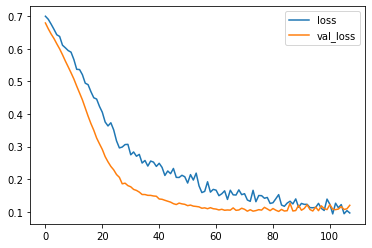

In [49]:
losses.plot()

In [50]:
#we can see there is alot of improvement here now.
#adding dropout layers and early stopping has increased model's performance

In [51]:
#for multiclassification use
#np.argmax(model.predict(x), axis=-1)
#for binary classification use below
#model.predict_classes(xtest) is depriciated and no longer available.
pred=(model.predict(xtest) > 0.5).astype("int32")

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(confusion_matrix(ytest,pred))
print('\n')
print(classification_report(ytest,pred))

[[54  1]
 [ 4 84]]


              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143

